In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv('sales.csv')

In [32]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [33]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [34]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [35]:
## Drop last 2 rows
# df.drop(106,axis=0,inplace=True)

In [36]:
# df.tail()

In [37]:
# df.drop(105,axis=0,inplace=True)

In [38]:
df.tail()

,Month,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [39]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [40]:

df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [41]:
# set month column as an index
df.set_index('Month',inplace=True)

In [42]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [43]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

<Axes: xlabel='Month'>

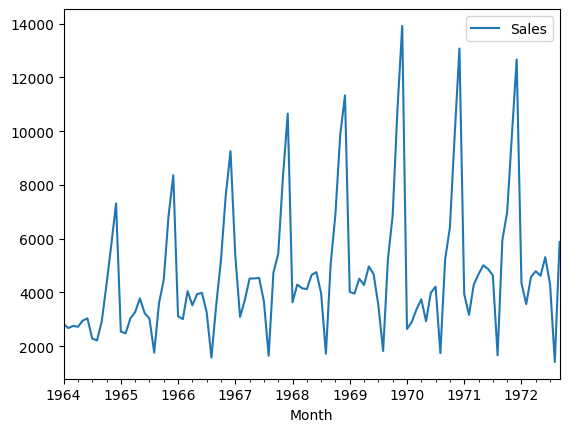

In [44]:
df.plot()

In [45]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [46]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    
    if result[1] <= 0.05:
        print("is stationary")
    else:
        print("is non-stationary ")
    

In [47]:
adfuller_test(df['Sales'])

is non-stationary 


## Differencing ( target to make stationary)

In [48]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [49]:
df.head(14)

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,NaN
1964-03-01,2755,NaN
1964-04-01,2721,NaN
1964-05-01,2946,NaN
1964-06-01,3036,NaN
1964-07-01,2282,NaN
1964-08-01,2212,NaN
1964-09-01,2922,NaN


In [50]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

is stationary


In [51]:
df['Seasonal First Difference'].dropna()

Month
1965-01-01   -274.0
1965-02-01   -197.0
1965-03-01    276.0
1965-04-01    545.0
1965-05-01    830.0
              ...  
1972-05-01   -392.0
1972-06-01    438.0
1972-07-01   -335.0
1972-08-01   -246.0
1972-09-01    -74.0
Name: Seasonal First Difference, Length: 93, dtype: float64

In [23]:
# df=df.drop(['Sales'],axis=1)

In [52]:
df.head()

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,NaN
1964-03-01,2755,NaN
1964-04-01,2721,NaN
1964-05-01,2946,NaN


In [25]:
# df=df.dropna()

In [ ]:

pd.plotting.autocorrelation_plot(df)
plt.show()

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [54]:
df.head()

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,NaN
1964-03-01,2755,NaN
1964-04-01,2721,NaN
1964-05-01,2946,NaN


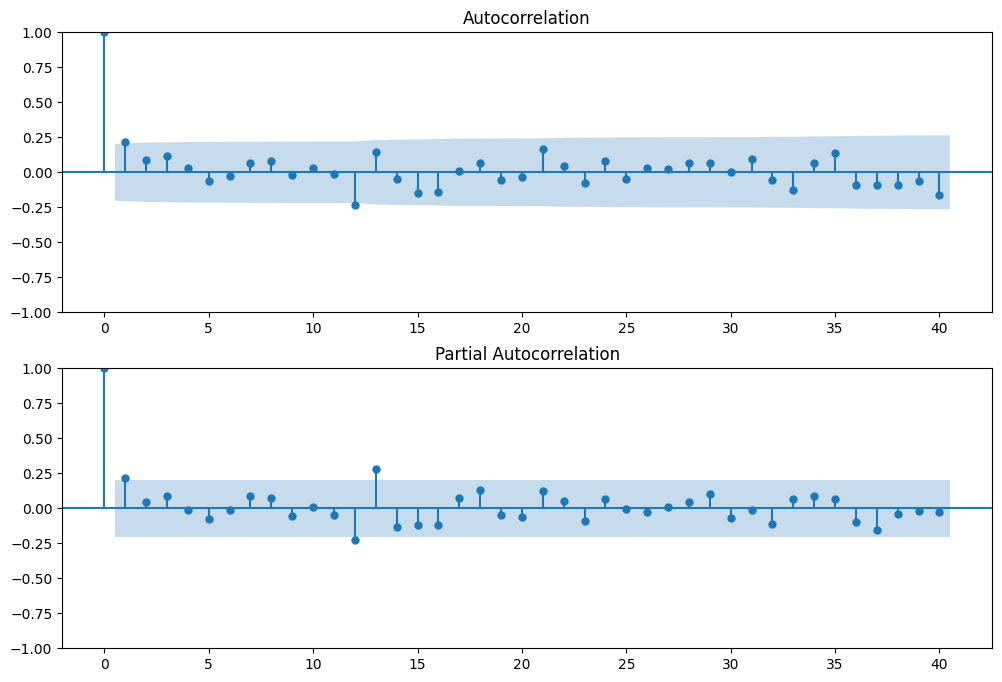

In [55]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [56]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [57]:
autoarima_model = auto_arima(df['Seasonal First Difference'].dropna(), trace=True)
print(autoarima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1500.884, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1498.453, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1498.864, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1511.271, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1500.270, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1500.341, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1502.216, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1503.527, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 3.240 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   93
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -746.227
Date:                Thu, 18 Jan 2024   AIC           

In [81]:
size = int(len(df) * 0.85)
train = df[:size]
test = df[size:]

In [82]:
train.head()

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,NaN
1964-03-01,2755,NaN
1964-04-01,2721,NaN
1964-05-01,2946,NaN


In [105]:
model=SARIMAX(train['Sales'],order=(1,0,1),seasonal_order=(1,0,1,12))
results=model.fit()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Predict only test equivalent values

In [131]:
prediction=results.predict(start=len(train),end=len(df)-1,dynamic=True)


In [144]:
abs(prediction-test['Sales'])

1971-06-01      80.793363
1971-07-01      48.515508
1971-08-01     710.029812
1971-09-01     289.267159
1971-10-01     108.759725
1971-11-01     344.977101
1971-12-01     521.027753
1972-01-01     298.328553
1972-02-01      91.821372
1972-03-01     187.898031
1972-04-01      79.683128
1972-05-01     211.234081
1972-06-01     507.548279
1972-07-01     387.431964
1972-08-01    1009.341835
1972-09-01     254.334167
Freq: MS, dtype: float64

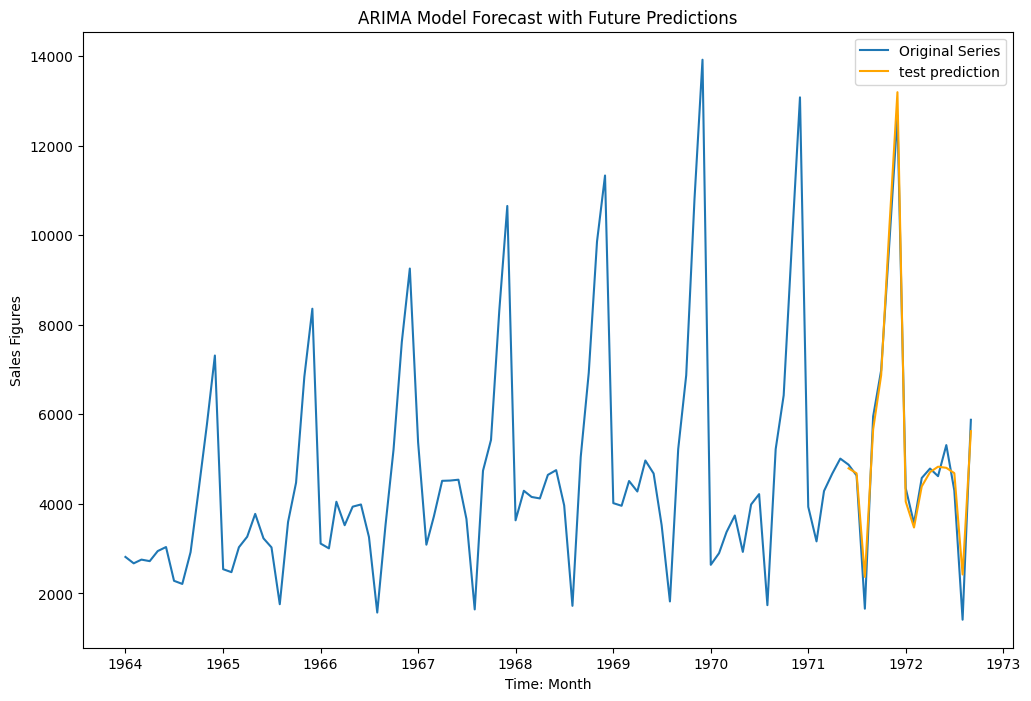

In [133]:
plt.figure(figsize=(12, 8))
plt.plot(df['Sales'], label='Original Series')
plt.plot(prediction, color='orange', label='test prediction')
plt.title('ARIMA Model Forecast with Future Predictions')
plt.xlabel('Time: Month')
plt.ylabel('Sales Figures')
plt.legend()
plt.show()

In [134]:
test

,Sales,Seasonal First Difference
Month,,
1971-06-01,4874,888.0
1971-07-01,4633,416.0
1971-08-01,1659,-79.0
1971-09-01,5951,730.0
1971-10-01,6981,557.0
1971-11-01,9851,9.0
1971-12-01,12670,-406.0
1972-01-01,4348,414.0
1972-02-01,3564,402.0


# error calculation

In [135]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [143]:
# test.mean()
prediction.mean()

5421.757767355835

In [137]:
rmse= sqrt(mean_squared_error(prediction,test['Sales']))
rmse

408.79996123335945

# Future forecasting

In [138]:
# future_datest_df=pd.DataFrame(index=future_dates[0:])


future_datest_df=pd.date_range(start='1972-09-01',end='1974-08-01' , freq='MS')
future_datest_df=pd.DataFrame(index=future_datest_df)
# future_datest_df.head(20)

In [139]:
future_datest_df = results.predict(start = 104, end = 120, dynamic= True)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


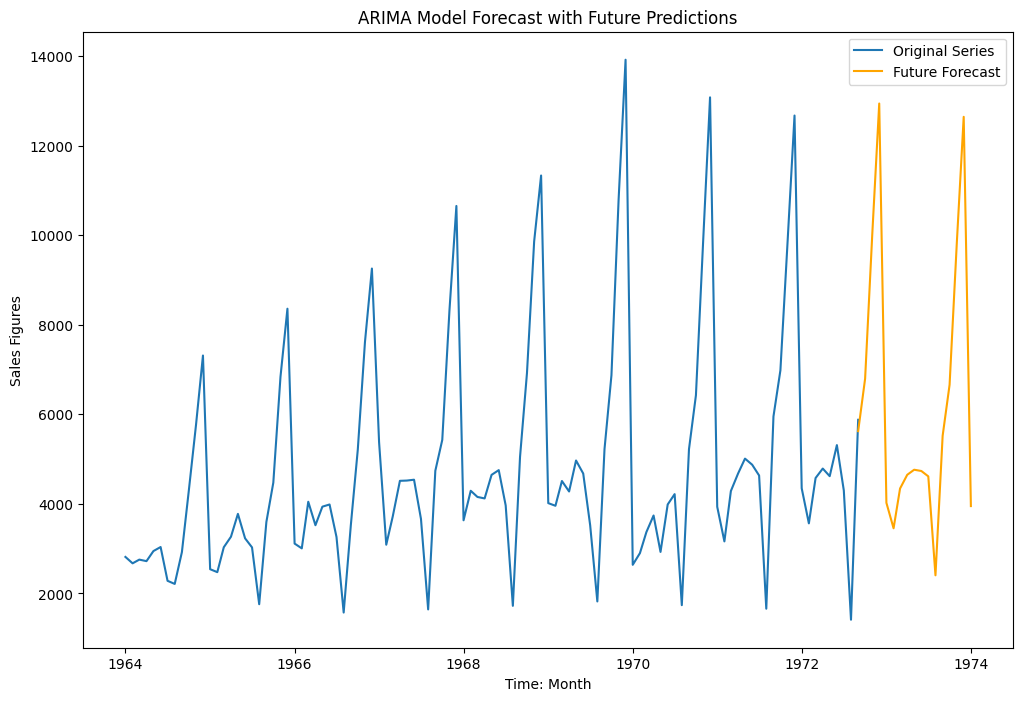

In [140]:
plt.figure(figsize=(12, 8))
plt.plot(df['Sales'], label='Original Series')
plt.plot(future_datest_df, color='orange', label='Future Forecast')
plt.title('ARIMA Model Forecast with Future Predictions')
plt.xlabel('Time: Month')
plt.ylabel('Sales Figures')
plt.legend()
plt.show()